# Logistic Regression on Weather Forecast Data to Predict Rainfall.

## Importing Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv(r'csvs/weather_forecast_data.csv')
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Plotting

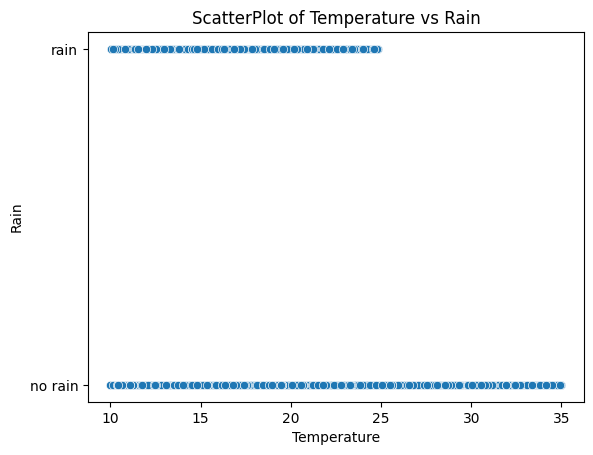

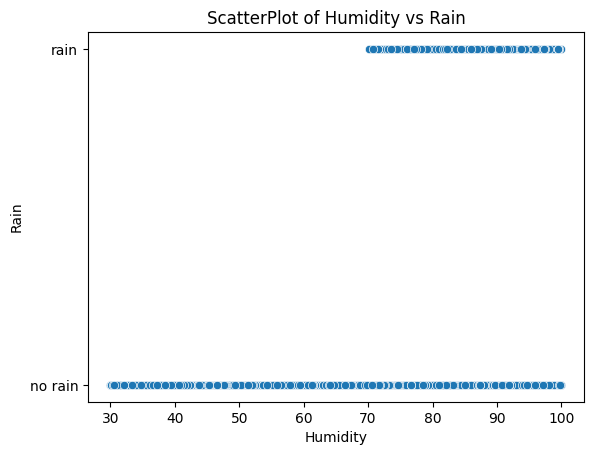

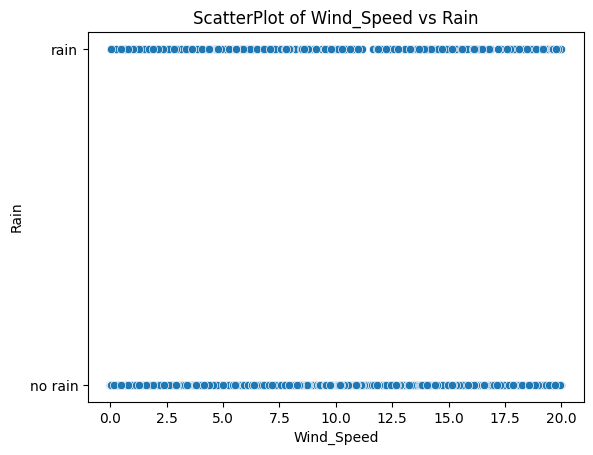

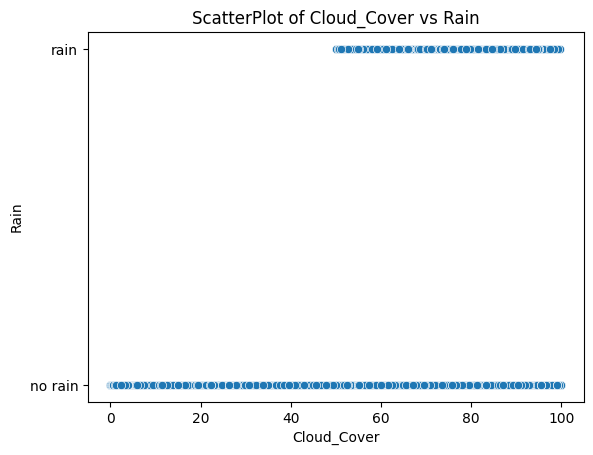

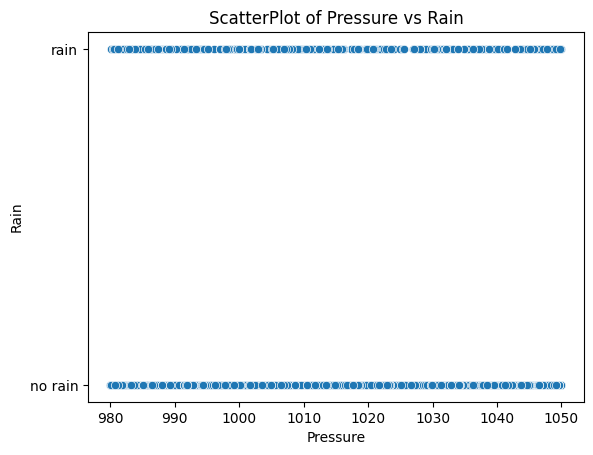

In [18]:
for column in df.columns:
    if column != 'Rain':
        plt.figure()
        sns.scatterplot(x = df[column],y = df['Rain'])
        plt.xlabel(column)
        plt.ylabel("Rain")
        plt.title(f"ScatterPlot of {column} vs Rain")
        plt.show()

## Splitting Data

In [32]:
x = df.drop(['Rain'],axis=1)
y = df['Rain']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
dtypes: float64(5)
memory usage: 97.8 KB


## Scaledown the features

In [33]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Model

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("accuracy score:",accuracy_score(y_test, y_pred))
print("classification report:",classification_report(y_test, y_pred))
print("confusion matrix:",confusion_matrix(y_test, y_pred))


accuracy score: 0.932
classification report:               precision    recall  f1-score   support

     no rain       0.95      0.97      0.96       443
        rain       0.73      0.63      0.68        57

    accuracy                           0.93       500
   macro avg       0.84      0.80      0.82       500
weighted avg       0.93      0.93      0.93       500

confusion matrix: [[430  13]
 [ 21  36]]
